# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

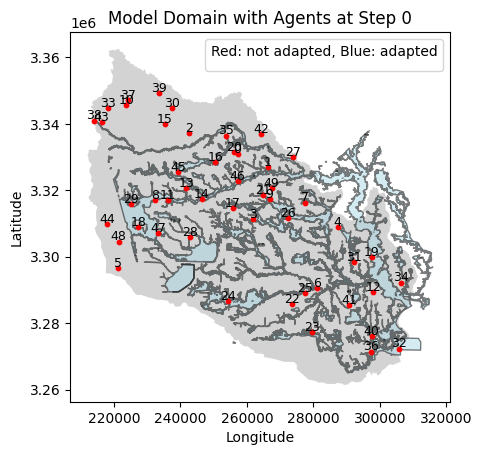

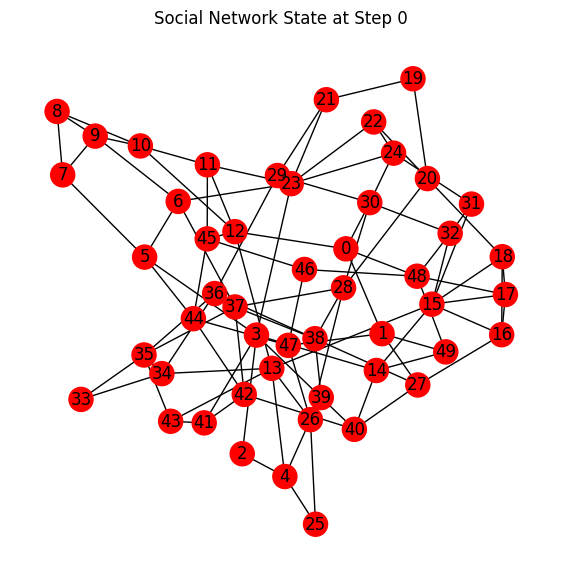

<Figure size 1000x600 with 0 Axes>

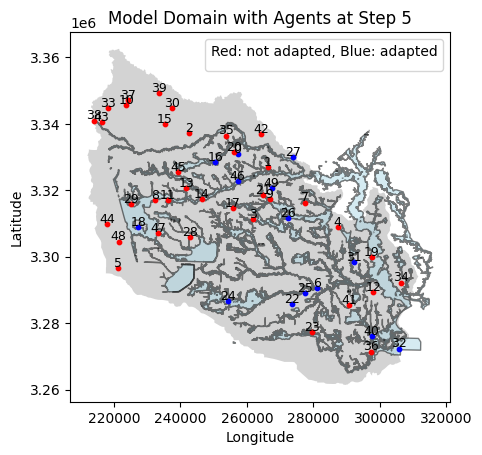

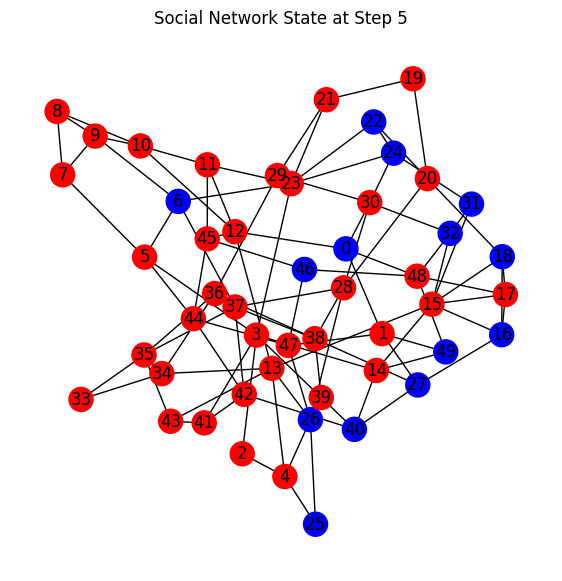

<Figure size 1000x600 with 0 Axes>

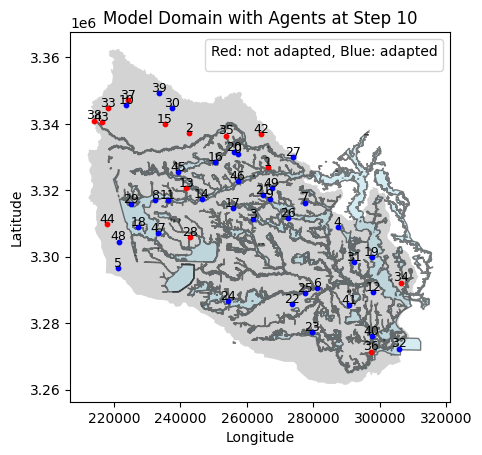

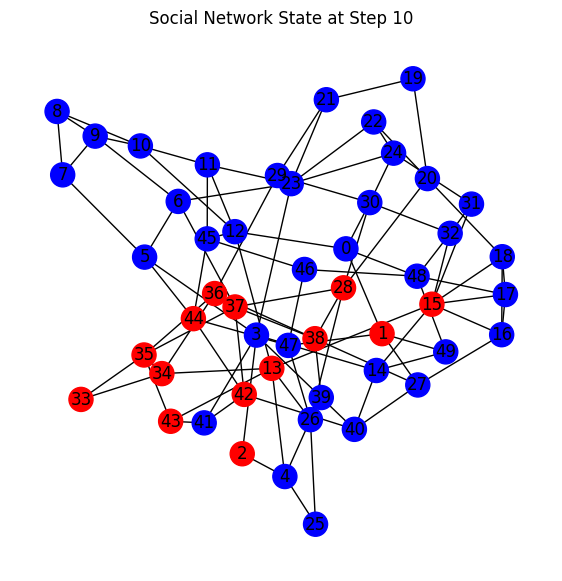

<Figure size 1000x600 with 0 Axes>

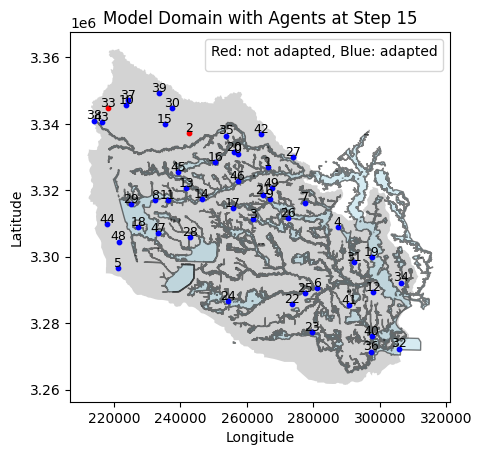

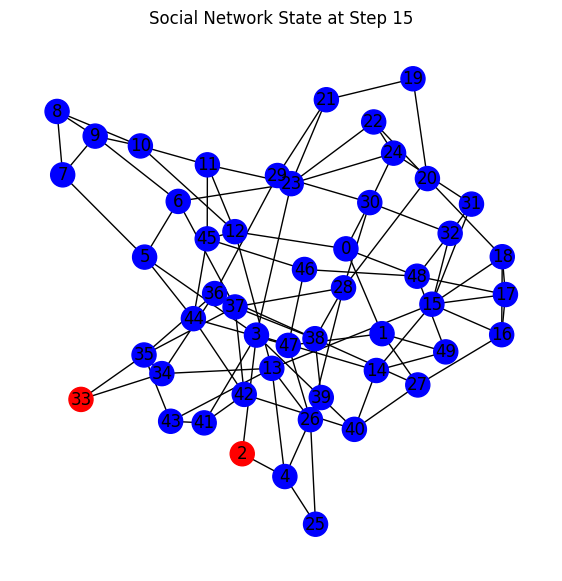

<Figure size 1000x600 with 0 Axes>

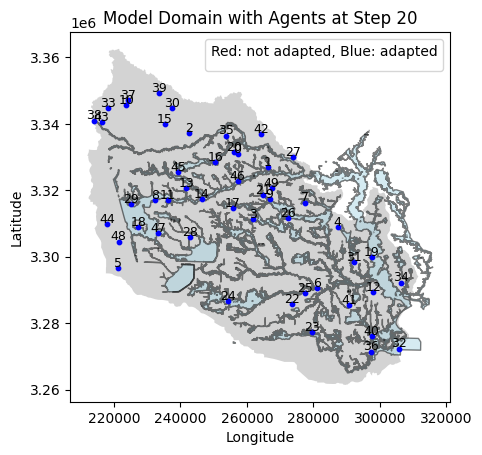

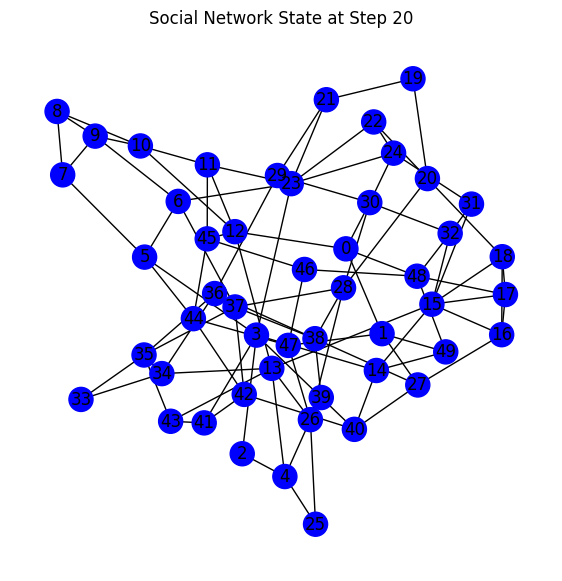

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()



In [2]:
import pandas as pd

In [3]:
agent_data = model.datacollector.get_agent_vars_dataframe()
#agent_data['Worry'].describe()
#agent_data.worry 
agent_data['Age'].describe()
agent_data.iloc[-50:-1]['FloodDamageActual'].sum()
#agent_data.to_csv('I=55000')

14.787429058245976

In [4]:
I_4000= pd.read_csv('I=40000')
I_4500 = pd.read_csv('I=45000')
I_5000 = pd.read_csv('I=50000')
I_5500 = pd.read_csv('I=55000')


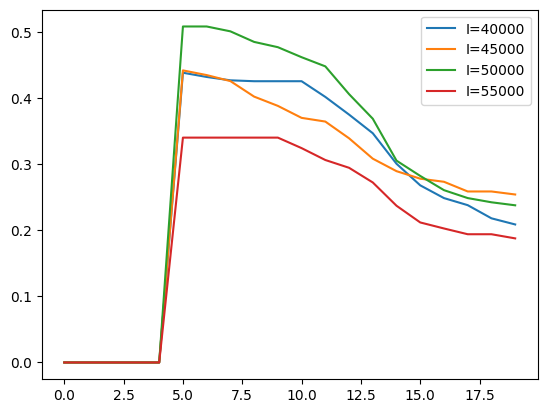

In [5]:
plt.plot(I_4000.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=40000')
plt.plot(I_4500.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=45000')
plt.plot(I_5000.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=50000')
plt.plot(I_5500.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=55000')
plt.legend()

In [6]:
agent_data.iloc[-50:-1]['Self_Investment'].mean() #average of self_investment of all agent

0.5510204081632653

In [7]:
agent_data.iloc[-50:-1]['Cum_Invest'].mean() #average of cumulative neighbor investment of all agents
#lower value probably because some agent do not have neighbors

2.2489795918367346

In [8]:
agent_data.iloc[-50:-1]['Costs'].mean()

0.32530612244897955

In [9]:
steps = np.arange(0,20)

Text(0.5, 1.0, 'Cumulative Neighbour Invest over Time')

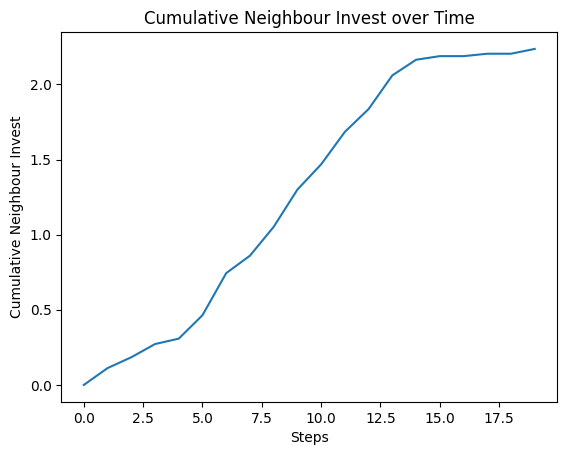

In [10]:
plt.plot(steps, agent_data.groupby(by='Step')['Cum_Invest'].mean(), label = 'Cumulative Neighbour Invest')
plt.ylabel('Cumulative Neighbour Invest')
plt.xlabel('Steps')
plt.title('Cumulative Neighbour Invest over Time')

Text(0.5, 1.0, 'Self Adaptation')

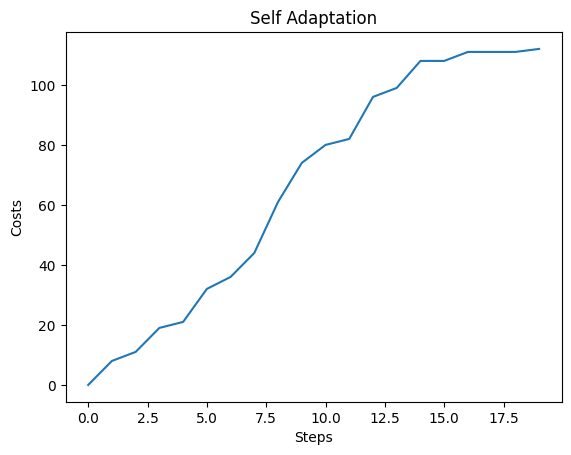

In [11]:
plt.plot(steps, agent_data.groupby(by='Step')['Self_Adaption'].sum(), label = 'Costs')
plt.ylabel('Costs')
plt.xlabel('Steps')
plt.title('Self Adaptation')

Text(0.5, 1.0, 'Costs over Time')

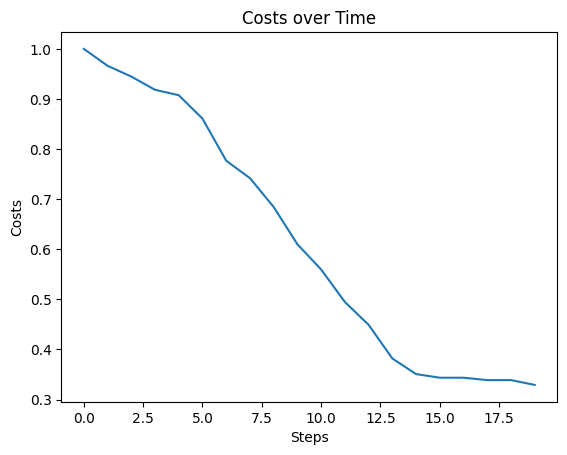

In [12]:
plt.plot(steps, agent_data.groupby(by='Step')['Costs'].mean(), label = 'Costs')
plt.ylabel('Costs')
plt.xlabel('Steps')
plt.title('Costs over Time')

Text(0.5, 1.0, 'Worry over Time')

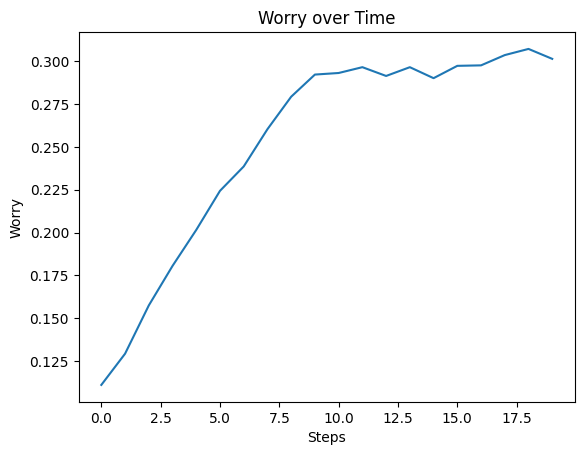

In [13]:
plt.plot(steps, agent_data.groupby(by='Step')['Worry'].mean(), label='Worry')
plt.ylabel('Worry')
plt.xlabel('Steps')
plt.title('Worry over Time')

Text(0.5, 1.0, 'Flood Damage over Time')

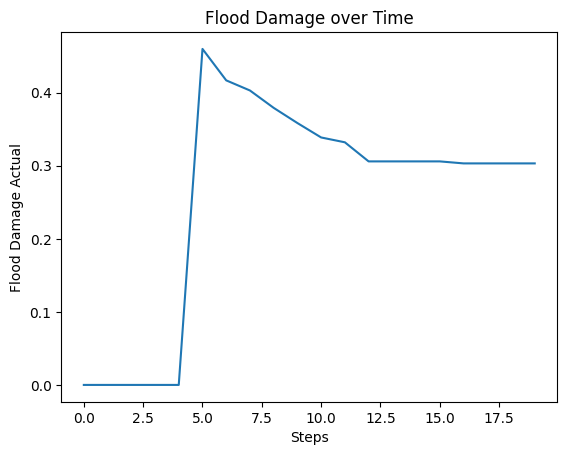

In [14]:
plt.plot(steps, agent_data.groupby(by='Step')['FloodDamageActual'].mean())
plt.ylabel('Flood Damage Actual')
plt.xlabel('Steps')
plt.title('Flood Damage over Time')

In [15]:
import pandas as pd

In [16]:
#I_50000 = agent_data.groupby(by='Step')['Worry'].mean()
I_45000 = agent_data.groupby(by='Step')['Worry'].mean()
#I_55000 = agent_data.groupby(by='Step')['Worry'].mean()

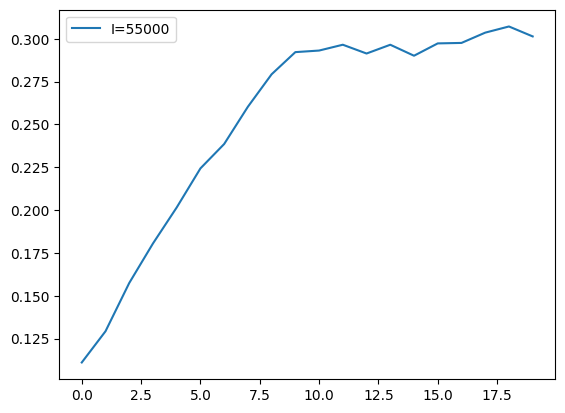

In [17]:
#plt.plot(I_50000, label='I=50000')
#plt.plot(I_45000, label='I=45000')
plt.plot(agent_data.groupby(by='Step')['Worry'].mean(), label='I=55000')
plt.legend()

Text(0.5, 1.0, 'Flood measurement active (Step10)')

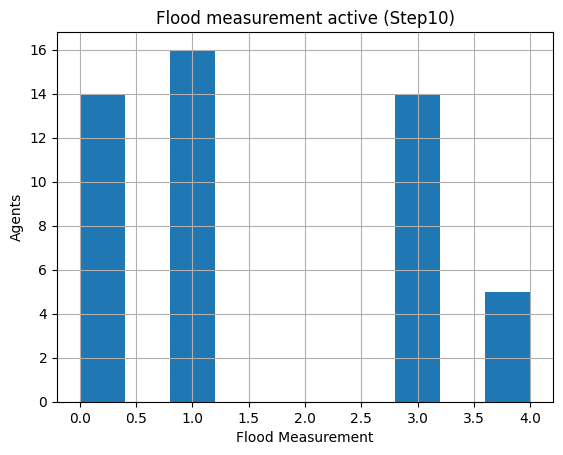

In [18]:
agent_data.iloc[-500:-451]['Self_Adaption'].hist()
plt.ylabel('Agents')
plt.xlabel('Flood Measurement')
plt.title('Flood measurement active (Step10)')

Text(0.5, 1.0, 'Flood measurement active (Step19)')

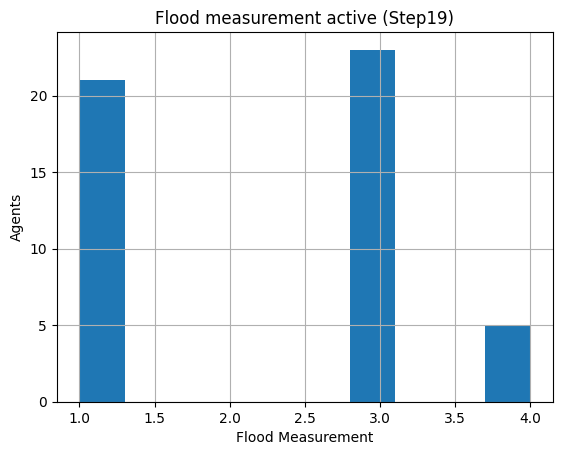

In [19]:
agent_data.iloc[-50:-1]['Self_Adaption'].hist()
plt.ylabel('Agents')
plt.xlabel('Flood Measurement')
plt.title('Flood measurement active (Step19)')

<Axes: xlabel='Step'>

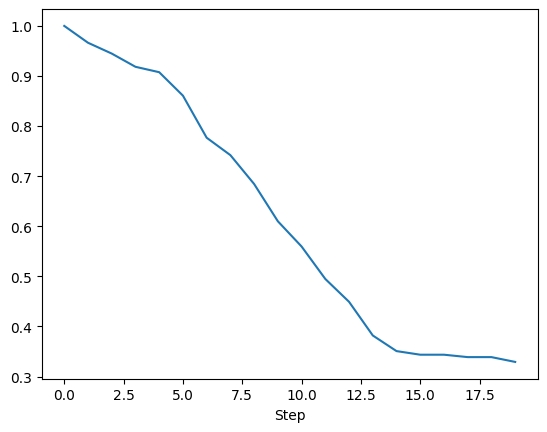

In [20]:
agent_data.groupby(by='Step')['Costs'].mean().plot()

In [21]:
agent_data.iloc[-50:-1]

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
19   0                   3.484249              0.866245          2.429359   
     1                   0.000000              0.000000          0.000000   
     2                   0.000000              0.000000          0.000000   
     3                   0.254951              0.409677          0.299922   
     4                   0.275651              0.423307          0.295449   
     5                   0.454025              0.510435          0.481667   
     6                  17.034500              1.000000         10.167535   
     7                   0.458334              0.512085          0.309376   
     8                   0.151814              0.319161          0.144045   
     9                   0.183563              0.352319          0.204101   
     10                  2.337379              0.796541          2.076010   
     11                  0.417992              0.495997          0.239013   
     12                  0.586226              0.555055          0.640231   
     13                  0.233841              0.394586          0.256247   
     14                  2.389523              0.800393          1.671576   
     15                  0.000000              0.000000          0.000000   
     16                  2.004490              0.769715          1.385010   
     17                  0.461430              0.513260          0.523129   
     18                  0.742889              0.596407          0.448069   
     19                  2.891538              0.833688          2.331247   
     20                  0.343620              0.461789          0.399455   
     21                  0.290398              0.432406          0.190334   
     22                  0.996311              0.647655          0.812780   
     23                  1.693991              0.740329          1.261531   
     24                  1.265303              0.689385          0.656273   
     25                  0.805478              0.610531          0.432767   
     26                  0.417418              0.495758          0.355391   
     27                  0.564772              0.548545          0.375598   
     28                  0.316048              0.447185          0.378046   
     29                  0.545967              0.542633          0.416267   
     30                  0.287117              0.430423          0.149224   
     31                  0.772225              0.603170          0.889278   
     32                  3.491010              0.866583          3.796206   
     33                  0.182259              0.351073          0.174052   
     34                  0.881528              0.626283          0.929101   
     35                  0.000000              0.000000          0.000000   
     36                  0.385686              0.481953          0.270295   
     37                  0.000000              0.000000          0.000000   
     38                  0.000000              0.000000          0.000000   
     39                  0.742691              0.596361          0.443502   
     40                  3.859227              0.884092          3.835590   
     41                  0.541327              0.541143          0.440652   
     42                  0.517456              0.533268          0.260630   
     43                  0.000000              0.000000          0.000000   
     44                  0.408314              0.491907          0.277305   
     45                  0.000000              0.000000          0.000000   
     46                  3.952192              0.888248          3.494382   
     47                  0.432701              0.502036          0.436623   
     48                  0.268135              0.418480          0.233127   

              FloodDamageActual  IsAdapted  FriendsCount  \
Step AgentID              

<Axes: >

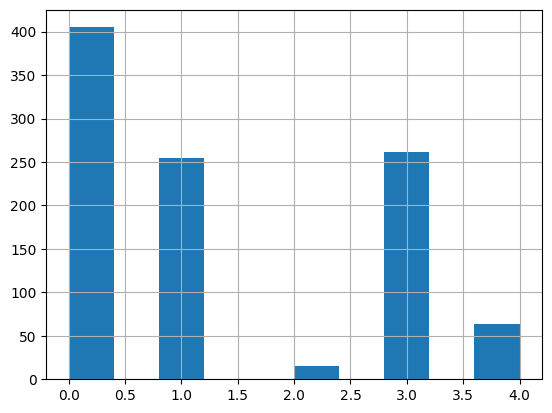

In [22]:
#last round Adaptation measurements: (step19)
agent_data['Self_Adaption'].hist()
#worry needs to have higher impact 

In [23]:
agent_data['FriendsCount']

Step  AgentID
0     0          4
      1          4
      2          2
      3          6
      4          4
                ..
19    45         4
      46         3
      47         4
      48         5
      49         3
Name: FriendsCount, Length: 1000, dtype: int64

<Axes: xlabel='Step'>

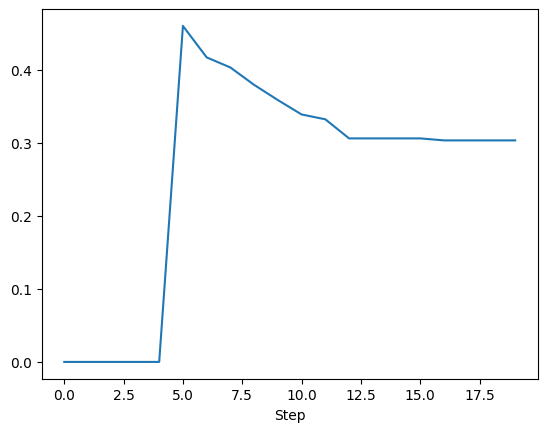

In [24]:
agent_data.groupby(by='Step')['FloodDamageActual'].mean().plot()
#agent_data.groupby(by='Step')['A].mean().plot()

<Axes: xlabel='Step'>

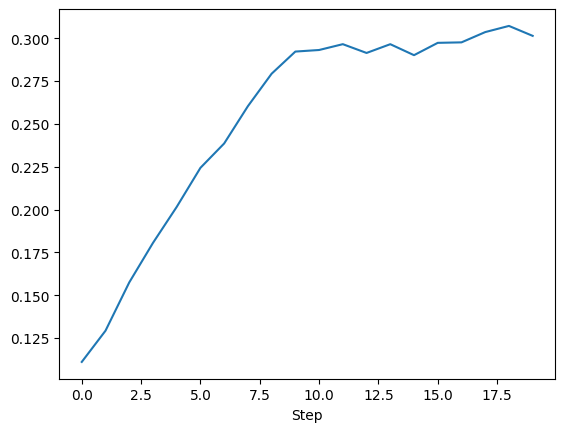

In [25]:
agent_data.groupby(by='Step')['Worry'].mean().plot()

In [26]:
agent_data.groupby(by='Step')['Self_Investment'].mean()


Step
0     0.000
1     0.048
2     0.056
3     0.084
4     0.116
5     0.152
6     0.216
7     0.244
8     0.296
9     0.344
10    0.400
11    0.432
12    0.496
13    0.504
14    0.528
15    0.528
16    0.536
17    0.536
18    0.536
19    0.552
Name: Self_Investment, dtype: float64

In [27]:
agent_data.iloc[-100:-51]['FloodDamageActual'].mean()

0.3017842664948158

In [28]:
agent_data.iloc[-500:-451]['FloodDamageActual'].mean()

0.3380057498392737

In [29]:
agent_data.iloc[-600:-551]['FloodDamageActual'].mean()

0.37936173862398875

In [30]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data
#change

,total_adapted_households
0,0
1,4
2,5
3,8
4,10
5,14
6,18
7,21
8,27
9,32
